In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 48
CHANNELS=3
EPOCHS=50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Training",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 28709 files belonging to 7 classes.


In [4]:
class_names = dataset.class_names
class_names

['0', '1', '2', '3', '4', '5', '6']

In [5]:
len(dataset)

898

In [6]:
898*32

28736

In [7]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 48, 48, 3)
[2 5 5 4 0 5 5 0 3 2 6 5 6 0 3 3 1 0 2 6 5 0 3 4 0 2 6 5 2 4 6 5]


In [8]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[ 85.  85.  85.]
  [ 83.  83.  83.]
  [107. 107. 107.]
  ...
  [110. 110. 110.]
  [182. 182. 182.]
  [179. 179. 179.]]

 [[ 77.  77.  77.]
  [103. 103. 103.]
  [120. 120. 120.]
  ...
  [101. 101. 101.]
  [176. 176. 176.]
  [182. 182. 182.]]

 [[ 87.  87.  87.]
  [114. 114. 114.]
  [126. 126. 126.]
  ...
  [ 97.  97.  97.]
  [155. 155. 155.]
  [166. 166. 166.]]

 ...

 [[192. 192. 192.]
  [185. 185. 185.]
  [180. 180. 180.]
  ...
  [ 61.  61.  61.]
  [ 44.  44.  44.]
  [ 25.  25.  25.]]

 [[191. 191. 191.]
  [186. 186. 186.]
  [181. 181. 181.]
  ...
  [ 60.  60.  60.]
  [ 43.  43.  43.]
  [ 20.  20.  20.]]

 [[190. 190. 190.]
  [189. 189. 189.]
  [183. 183. 183.]
  ...
  [ 59.  59.  59.]
  [ 46.  46.  46.]
  [ 17.  17.  17.]]]


In [9]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].shape)

(48, 48, 3)


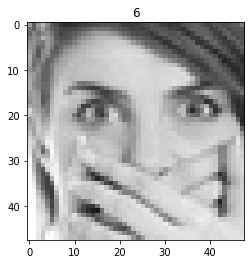

In [10]:
for image_batch, labels_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[labels_batch[0]])
#     plt.axis("off")

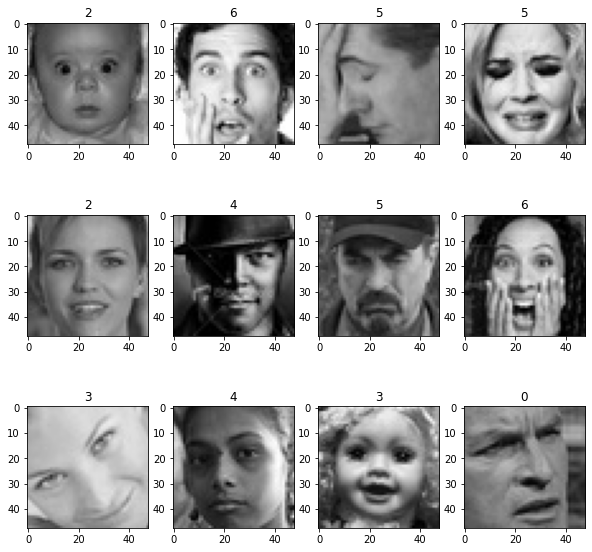

In [11]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
#         plt.axis("off")


In [12]:
len(dataset)

898

In [13]:

train_size = 0.8
len(dataset)*train_size

718.4000000000001

In [14]:
train_ds = dataset.take(718)
len(train_ds)

718

In [15]:
test_ds = dataset.skip(718)
len(test_ds)

180

In [16]:
val_size=0.1
len(dataset)*val_size

89.80000000000001

In [17]:
val_ds = test_ds.take(89)
len(val_ds)

89

In [18]:
test_ds = test_ds.skip(89)
len(test_ds)

91

In [19]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [20]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [21]:
len(train_ds)

718

In [22]:
len(val_ds)

89

In [23]:
len(test_ds)

91

In [24]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [25]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [26]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [29]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 7

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


model.build(input_shape=input_shape)

In [30]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 48, 48, 3)           0         
                                                                 
 conv2d_11 (Conv2D)          (32, 46, 46, 32)          896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (32, 23, 23, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (32, 21, 21, 64)          18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (32, 10, 10, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (32, 8, 8, 64)           

In [31]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [32]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
718/718 [==============================] - 49s 59ms/step - loss: 1.7487 - accuracy: 0.2854 - val_loss: 1.5671 - val_accuracy: 0.4122
Epoch 2/50
718/718 [==============================] - 55s 77ms/step - loss: 1.4955 - accuracy: 0.4191 - val_loss: 1.3412 - val_accuracy: 0.4951
Epoch 3/50
718/718 [==============================] - 44s 61ms/step - loss: 1.3453 - accuracy: 0.4877 - val_loss: 1.2543 - val_accuracy: 0.5200
Epoch 4/50
718/718 [==============================] - 52s 72ms/step - loss: 1.2542 - accuracy: 0.5186 - val_loss: 1.1706 - val_accuracy: 0.5558
Epoch 5/50
718/718 [==============================] - 51s 70ms/step - loss: 1.1866 - accuracy: 0.5512 - val_loss: 1.1096 - val_accuracy: 0.5857
Epoch 6/50
718/718 [==============================] - 80s 111ms/step - loss: 1.1351 - accuracy: 0.5696 - val_loss: 1.0583 - val_accuracy: 0.6001
Epoch 7/50
718/718 [==============================] - 60s 84ms/step - loss: 1.0892 - accuracy: 0.5880 - val_loss: 1.0153 - val_accuracy

In [33]:
scores = model.evaluate(test_ds)

91/91 [==============================] - 12s 21ms/step - loss: 0.8431 - accuracy: 0.8475


In [34]:
scores

[0.8430948853492737, 0.8475274443626404]

In [35]:

history

In [36]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 718}

In [37]:

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [38]:

type(history.history['loss'])

list

In [39]:
len(history.history['loss'])

50

In [40]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.7487249374389648,
 1.4955357313156128,
 1.3452543020248413,
 1.2541536092758179,
 1.186622977256775]

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

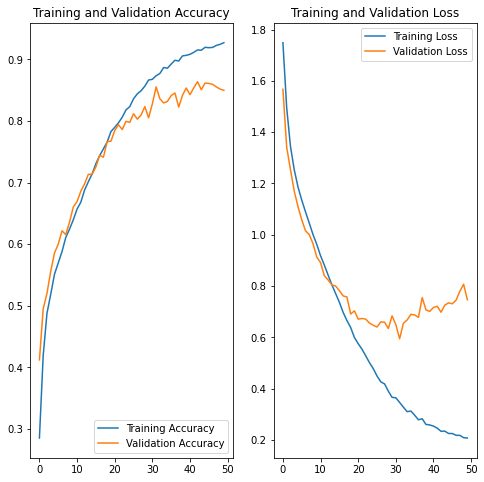

In [42]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: 4
1/1 [==============================] - 0s 469ms/step
predicted label: 4


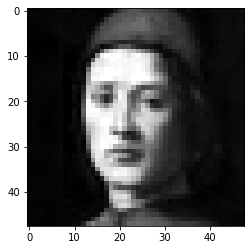

In [43]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [44]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 37ms/step


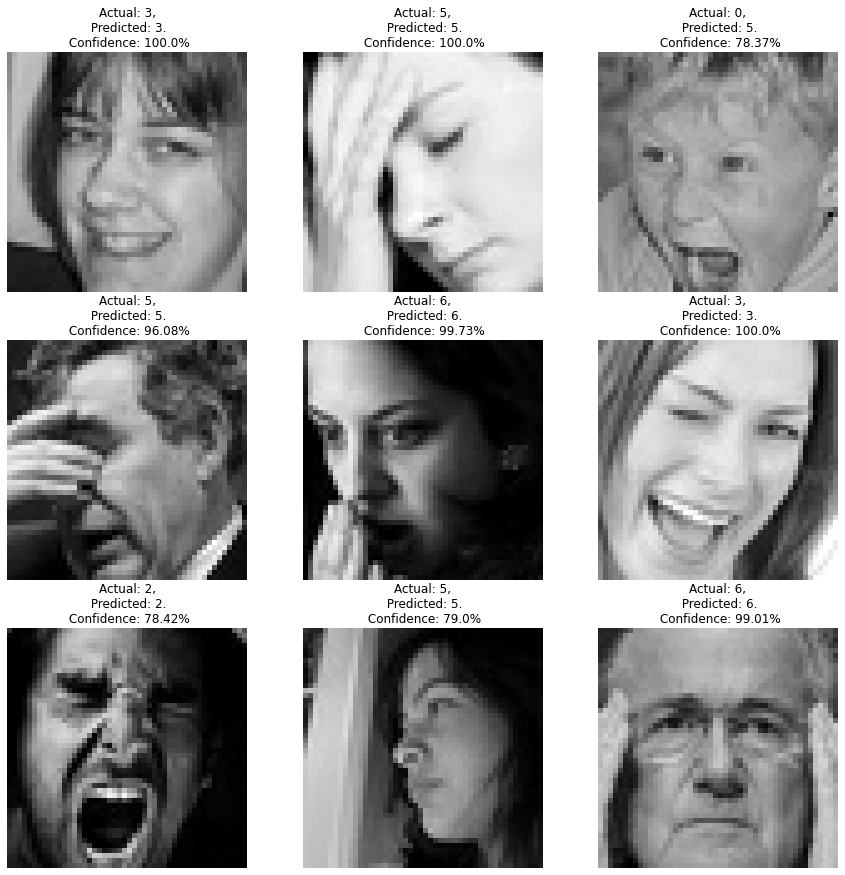

In [47]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [48]:
import os
model_version=max([int(i) for i in os.listdir("models") + [0]])+1
model.save(f"C:/Users/HARSHAL/models/{model_version}")

INFO:tensorflow:Assets written to: C:/Users/HARSHAL/models/4\assets


INFO:tensorflow:Assets written to: C:/Users/HARSHAL/models/4\assets


In [49]:

model.save("A-92-VA-85-FER.h5")